<a href="https://colab.research.google.com/github/haritha74/haritha/blob/main/project_movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

Recommender System is a system that seeks to predict or filter preferences according to the user's choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. Recommender systems produce a list of recommendations in any of the two ways-
Collaborative filtering: Collaborative filtering approaches build a model from the user's past behavior (i.e. Items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that users may have an interest in.
Content-based filtering: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user's preferences. It recommends items based on the user's past preferences. Let's develop a basic recommendation system using Python and Pandas.
Let's develop a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. It just tells what movies/items are most similar to the user's movie choice.

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **Import Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')



In [ ]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
df.count()

Movie_ID                    4760
Movie_Title                 4760
Movie_Genre                 4760
Movie_Language              4760
Movie_Budget                4760
Movie_Popularity            4760
Movie_Release_Date          4760
Movie_Revenue               4760
Movie_Runtime               4758
Movie_Vote                  4760
Movie_Vote_Count            4760
Movie_Homepage              1699
Movie_Keywords              4373
Movie_Overview              4757
Movie_Production_House      4760
Movie_Production_Country    4760
Movie_Spoken_Language       4760
Movie_Tagline               3942
Movie_Cast                  4733
Movie_Crew                  4760
Movie_Director              4738
dtype: int64

In [ ]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [ ]:
df.groupby('Movie_Budget').count()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
Movie_Budget,,,,,,,,,,,,,,,,,,,,
0,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,226,794,1011,1011,1011,1011,588,991,1011,999
1,6,6,6,6,6,6,6,6,6,6,1,4,6,6,6,6,4,5,6,5
2,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260000000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
270000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
280000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
print(df['Movie_Budget'].mean())
print(df['Movie_Budget'].min())
print(df['Movie_Budget'].max())
print(df['Movie_Budget'].sum())

29201287.084033612
0
380000000
138998126520


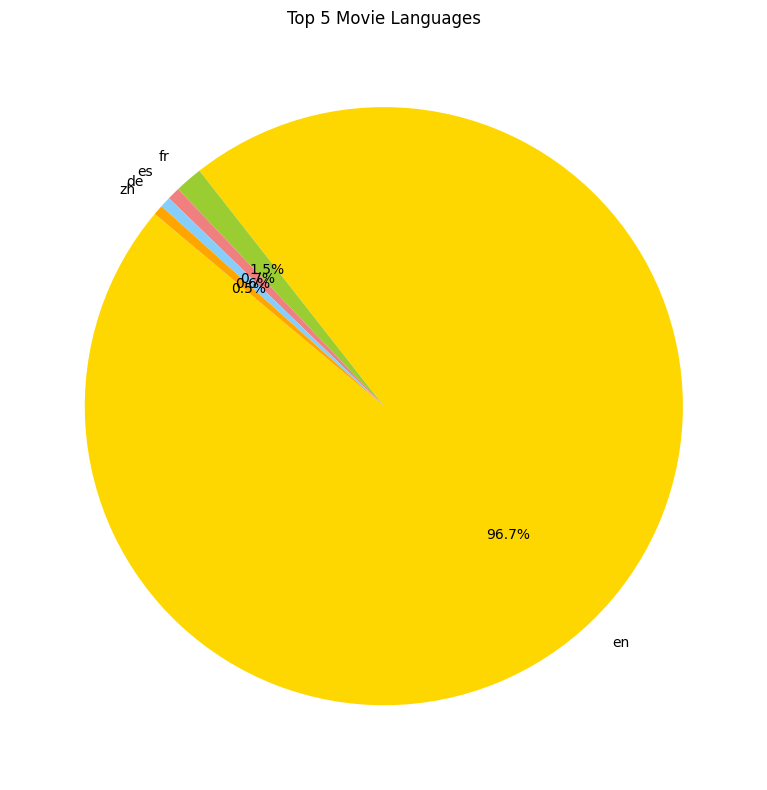

In [ ]:

language_counts = df['Movie_Language'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange'])
plt.title('Top 5 Movie Languages')
plt.tight_layout()
plt.show()


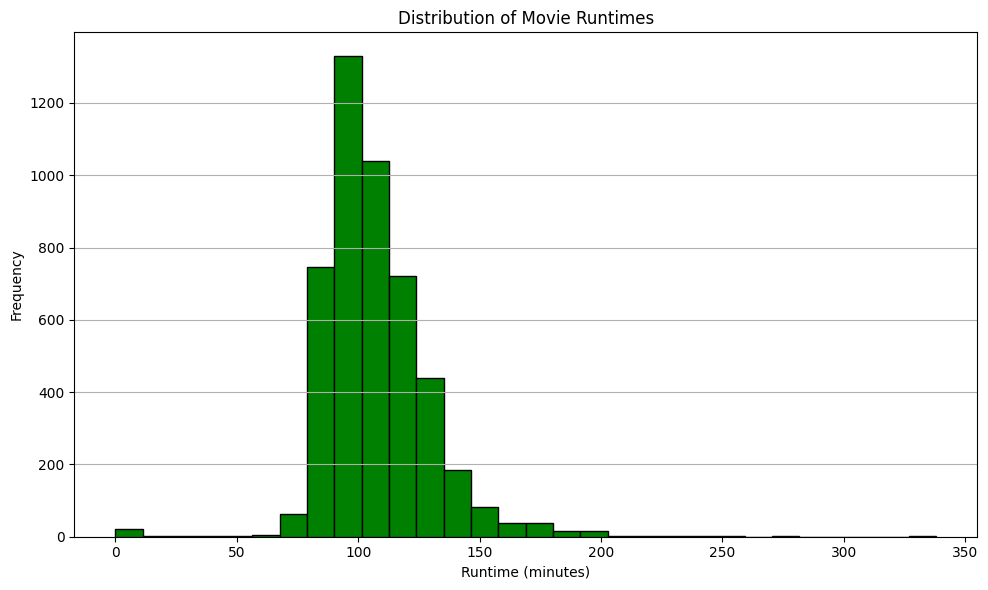

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['Movie_Runtime'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



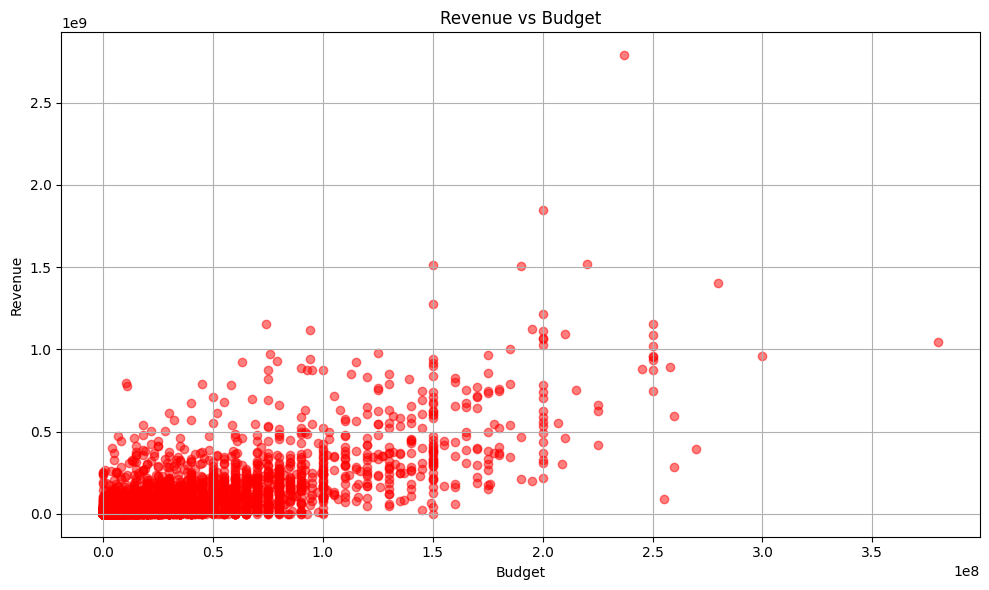

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Movie_Budget'], df['Movie_Revenue'], color='red', alpha=0.5)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


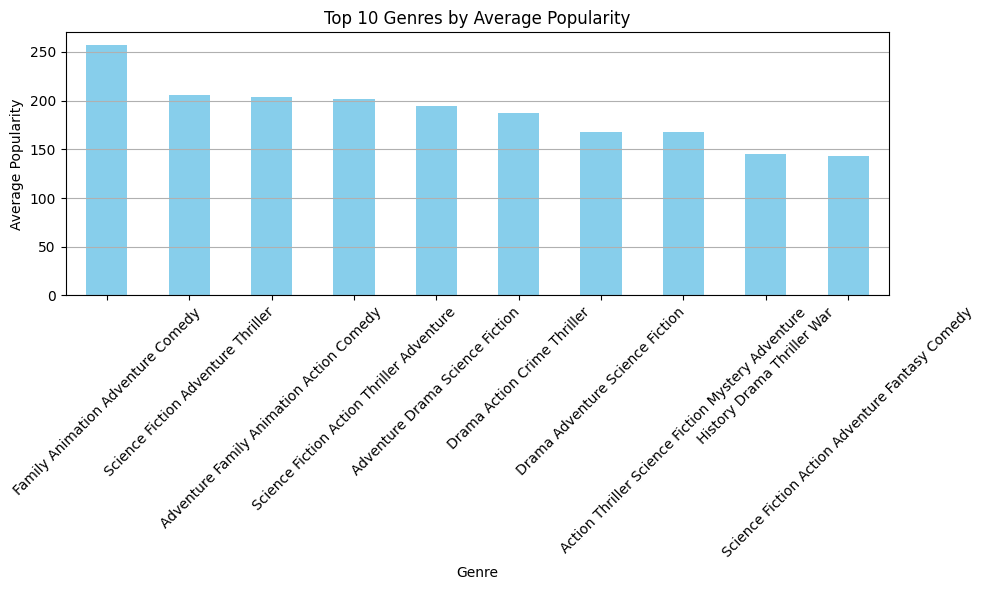

In [ ]:

avg_popularity = df.groupby('Movie_Genre')['Movie_Popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_popularity.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


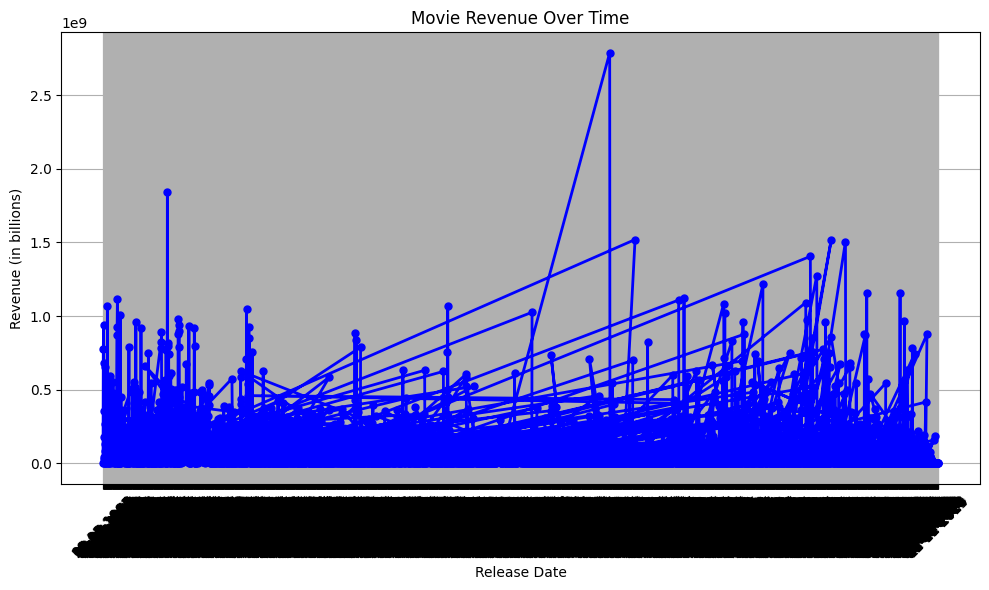

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df['Movie_Release_Date'], df['Movie_Revenue'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Movie Revenue Over Time')
plt.xlabel('Release Date')
plt.ylabel('Revenue (in billions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains target variables (labels)
X = df[['Movie_Budget', 'Movie_Popularity', 'Movie_Runtime']]  # Example features
y = df['Movie_Revenue']  # Example target variable

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example print to verify sizes
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (3808, 3) (3808,)
Test set size: (952, 3) (952,)
